<a href="https://colab.research.google.com/github/Puneet289/practicesets/blob/master/diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('/content/drive/My Drive/Datasets/diamonds.csv')

In [0]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


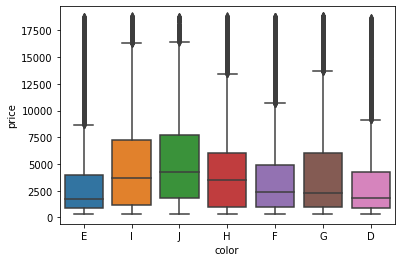

In [0]:
sns.boxplot(x='color',y='price',data=df)

In [0]:
def chngcolor(inp):
  switcher={
      'D':0,
      'E':1,
      'F':2,
      'G':3,
      'H':4,
      'I':5,
      'J':6
  }
  return switcher.get(inp,"nothing")

In [0]:
def chngcut(inp):
  switcher={
      'Ideal':0,
      'Premium':1,
      'Very Good':2,
      'Good':3,
      'Fair':4
  }
  return switcher.get(inp,"nothing")

In [0]:
def chngclarity(inp):
  switcher={
      'SI2':0,
      'SI1':1,
      'VS1':2,
      'VS2':3,
      'VVS2':4,
      'VVS1':5,
      'I1':6,
      'IF':7
  }
  return switcher.get(inp,"nothing")

In [0]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [0]:
df['color']=df['color'].apply(chngcolor)

In [0]:
df['cut']=df['cut'].apply(chngcut)

In [0]:
df['clarity']=df['clarity'].apply(chngclarity)

In [0]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,1,0,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,1,1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,1,2,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,5,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,6,0,63.3,58.0,335,4.34,4.35,2.75


In [0]:
df.loc[df['x']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11182,11183,1.07,Ideal,2,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,11964,1.00,Very Good,4,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,15952,1.14,Fair,3,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,24521,1.56,Ideal,3,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,26244,1.20,Premium,0,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,27430,2.25,Premium,4,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,49557,0.71,Good,2,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,49558,0.71,Good,2,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [0]:
df=df.loc[(df['x']>0)|(df['y']>0)]

In [0]:
df['x'][11182]=df['x'].median()

In [0]:
df.loc[df['y']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [0]:
df=df.drop('Unnamed: 0',axis=1)

In [0]:
cor=df.corr()
cor

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.378020,-0.034914,-0.100907,-0.306921,-0.406245,-0.396414,-0.399784
carat,-0.378020,1.000000,0.028220,0.181650,0.921610,0.977761,0.953989,0.955653
depth,-0.034914,0.028220,1.000000,-0.295698,-0.010671,-0.025097,-0.029142,0.095344
table,-0.100907,0.181650,-0.295698,1.000000,0.127161,0.196129,0.184519,0.151624
price,-0.306921,0.921610,-0.010671,0.127161,1.000000,0.887226,0.867870,0.863686
x,-0.406245,0.977761,-0.025097,0.196129,0.887226,1.000000,0.974927,0.970437
y,-0.396414,0.953989,-0.029142,0.184519,0.867870,0.974927,1.000000,0.951848
z,-0.399784,0.955653,0.095344,0.151624,0.863686,0.970437,0.951848,1.000000


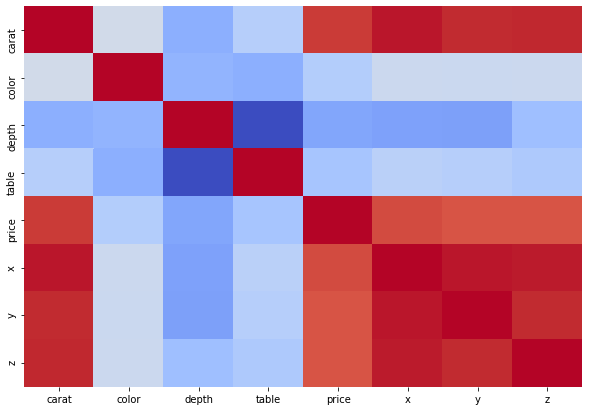

In [0]:
plt.figure(figsize=(10,7))
sns.heatmap(cor,cmap='coolwarm',annot=False,cbar=False)

In [0]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [0]:
X=df.drop('price',axis=1)

In [0]:
y=df['price']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,VotingRegressor,RandomForestRegressor,GradientBoostingRegressor
import xgboost as xg

In [0]:
lr=LinearRegression()
dtree=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=20)
adb=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=50)
bgr=BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=20)

In [0]:
evr=VotingRegressor([('lr',lr),('dtree',dtree)])
gbr=GradientBoostingRegressor()
xgr=xg.XGBRegressor()

In [0]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
adb.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [0]:
bgr.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [0]:
evr.fit(X_train,y_train)

VotingRegressor(estimators=[('lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('dtree',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                 

In [0]:
xgr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:03:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
xgr.score(X_test,y_test)

0.9970971873382969

In [0]:
print("Linear Regression:",lr.score(X_train,y_train),"\n","Decision Tree: ",dtree.score(X_train,y_train),"\n","Random Forest: ",rfr.score(X_train,y_train),"\n","Adaboost Regressor:",adb.score(X_train,y_train),"\n","Bagging Regressor:",bgr.score(X_train,y_train),"\n","Voting Regressor:",evr.score(X_train,y_train),"\n","GradientBoostingRegressor: ",gbr.score(X_train,y_train),"\n","XgboostRegressor: ",xgr.score(X_train,y_train))

Linear Regression: 0.8858665805582573 
 Decision Tree:  1.0 
 Random Forest:  0.9999845598148334 
 Adaboost Regressor: 0.9999999947798531 
 Bagging Regressor: 0.9999870539809013 
 Voting Regressor: 0.9714666451395645 
 GradientBoostingRegressor:  0.9974217608696087 
 XgboostRegressor:  0.9973053439398171


In [0]:
print("Linear Regression:",lr.score(X_test,y_test),"\n","Decision Tree: ",dtree.score(X_test,y_test),"\n","Random Forest: ",rfr.score(X_test,y_test),"\n","Adaboost Regressor:",adb.score(X_test,y_test),"\n","Bagging Regressor:",bgr.score(X_test,y_test),"\n","Voting Regressor:",evr.score(X_test,y_test),"\n","GradientBoostRegressor: ",gbr.score(X_test,y_test),"\n","XgboostRegressor: ",xgr.score(X_test,y_test))

Linear Regression: 0.8864390943677134 
 Decision Tree:  0.9998788512021802 
 Random Forest:  0.999934498215984 
 Adaboost Regressor: 0.999987882623947 
 Bagging Regressor: 0.9999356149272203 
 Voting Regressor: 0.9715577751887111 
 GradientBoostRegressor:  0.9971640057661899 
 XgboostRegressor:  0.9970971873382969
